# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results,mouse_metadata, on='Mouse ID',how="left")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].unique())

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df[['Mouse ID','Timepoint']].duplicated()==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df['Mouse ID']=='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_df.loc[mouse_df['Mouse ID']!='g989',:]
mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_groups = mouse_clean_df.groupby('Drug Regimen')
mean_mouse = mouse_groups['Tumor Volume (mm3)'].mean()
median_mouse = mouse_groups['Tumor Volume (mm3)'].median()
variance_mouse = mouse_groups['Tumor Volume (mm3)'].var()
std_mouse = mouse_groups['Tumor Volume (mm3)'].std()
sem_mouse = mouse_groups['Tumor Volume (mm3)'].sem()
mouse_summary_df =pd.DataFrame({'Mean Tumor Volume':mean_mouse,
                               'Median Tumor Volume':median_mouse,
                               "Tumor Volume Variance":variance_mouse,
                               "Tumor Volume Std. Dev.":std_mouse,
                               "Tumor Volume Std. Err.":sem_mouse})
mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_2 = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
mouse_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

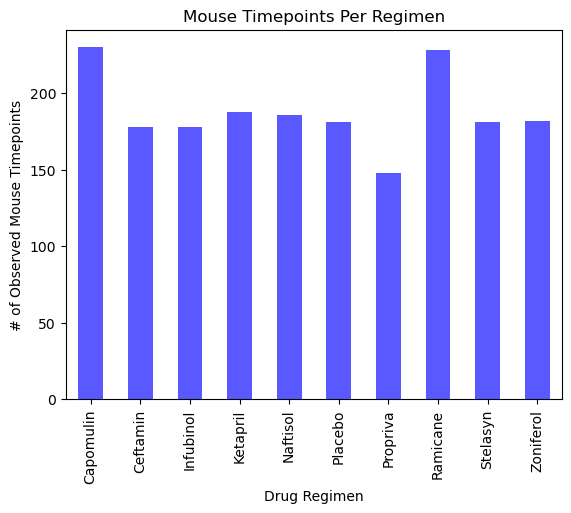

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = mouse_clean_df.groupby('Drug Regimen')['Timepoint'].count()
pandas_chart = mouse_timepoints.plot(kind='bar',title = "Mouse Timepoints Per Regimen",color='b',alpha=0.65)
pandas_chart.set_xlabel("Drug Regimen")
pandas_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

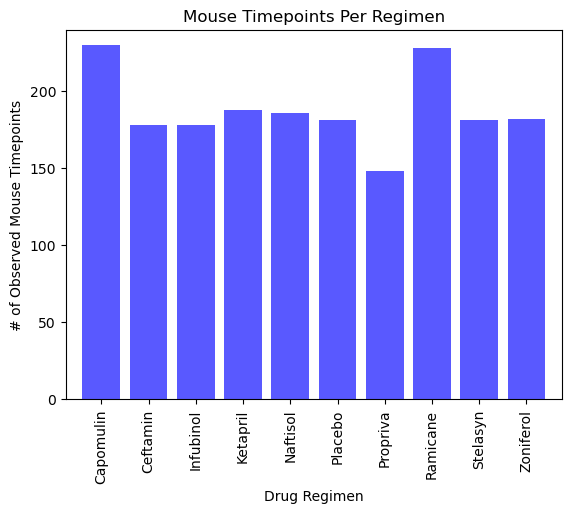

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoints = mouse_clean_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x_axis, mouse_timepoints, color='b', alpha=0.65, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_timepoints.index, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_timepoints)+10)
plt.title("Mouse Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

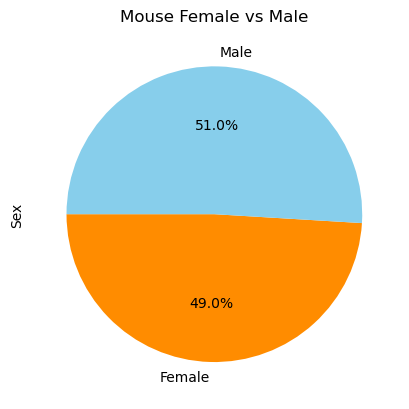

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_clean_df.groupby('Sex')['Mouse ID'].count()
mouse_sex.plot(kind='pie',title = "Mouse Female vs Male",
               ylabel = 'Sex',colors= ['darkorange','skyblue'],
               autopct="%1.1f%%",startangle=180)
plt.show()

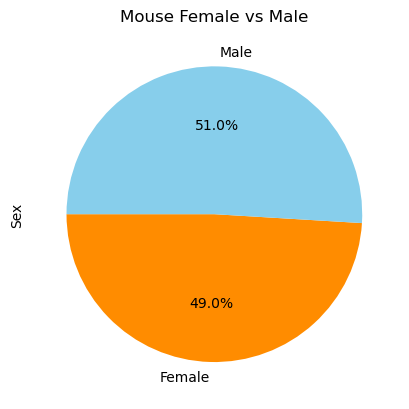

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_clean_df.groupby('Sex')['Mouse ID'].count()
plt.pie(mouse_sex,labels=mouse_sex.index, colors= ['darkorange','skyblue'],
               autopct="%1.1f%%",startangle=180)
plt.title("Mouse Female vs Male")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_df = mouse_clean_df.loc[(mouse_clean_df['Drug Regimen']=='Capomulin')|
                                      (mouse_clean_df['Drug Regimen']=='Ramicane')|
                                     (mouse_clean_df['Drug Regimen']=='Infubinol')|
                                     (mouse_clean_df['Drug Regimen']=='Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint =pd.DataFrame(four_regimens_df.groupby('Mouse ID').max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_regimens_with_greatest_df = pd.merge(four_regimens_df,greatest_timepoint, on='Mouse ID',
                                          how="left", suffixes=(' Original',' Greatest'))
four_regimens_with_greatest_df

,Mouse ID,Timepoint Original,Tumor Volume (mm3) Original,Metastatic Sites Original,Drug Regimen Original,Sex Original,Age_months Original,Weight (g) Original,Timepoint Greatest,Tumor Volume (mm3) Greatest,Metastatic Sites Greatest,Drug Regimen Greatest,Sex Greatest,Age_months Greatest,Weight (g) Greatest
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.651331,2,Capomulin,Female,9,22
1,c326,0,45.000000,0,Infubinol,Female,18,25,5,45.000000,0,Infubinol,Female,18,25
2,c139,0,45.000000,0,Infubinol,Male,11,28,45,72.226731,2,Infubinol,Male,11,28
3,v339,0,45.000000,0,Infubinol,Male,20,26,5,46.250112,0,Infubinol,Male,20,26
4,a577,0,45.000000,0,Infubinol,Female,6,25,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,45,46.910892,1,Ramicane,Female,7,17
810,i177,45,33.562402,3,Ramicane,Male,10,18,45,45.000000,3,Ramicane,Male,10,18
811,r944,45,41.581521,2,Capomulin,Male,12,25,45,47.373423,2,Capomulin,Male,12,25
812,u364,45,31.023923,3,Capomulin,Male,18,17,45,47.212200,3,Capomulin,Male,18,17


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = four_regimens_with_greatest_df['Drug Regimen Original'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


array(['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin'], dtype=object)

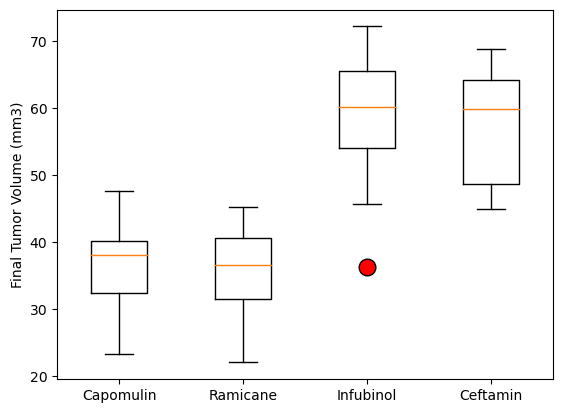

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

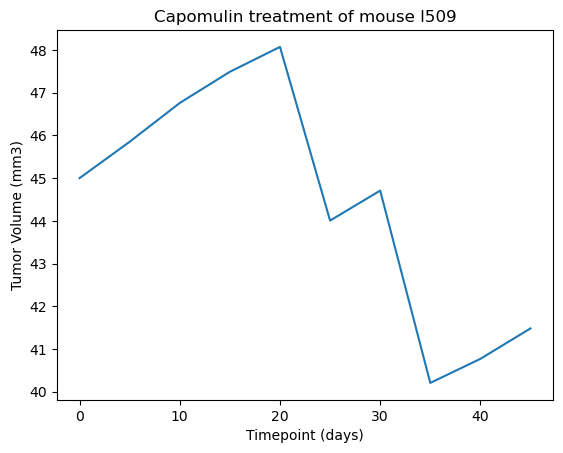

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


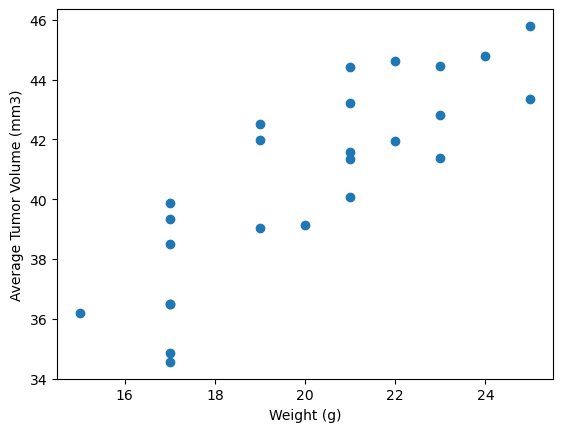

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


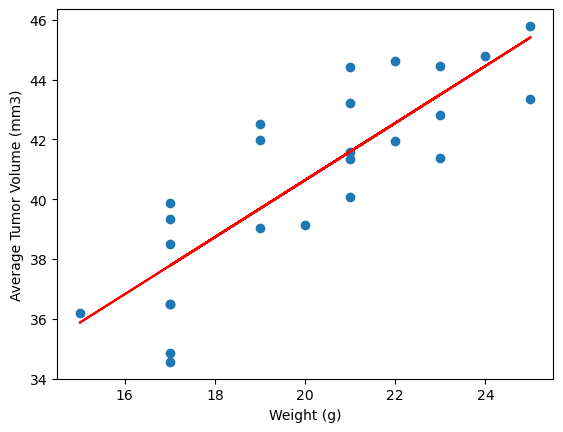

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
